In [147]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rand
from scipy.stats import norm


In [148]:
def E_and_V(x,X,t,sigma):
    pdf_vals = norm.pdf(x - X.reshape(10,1), loc = 0, scale = sigma).T
    pdf_vals = pdf_vals/(pdf_vals.sum(axis = 1,keepdims=True))

    Expectation = (pdf_vals * t.reshape(1,10)).sum(axis = 1)
    Cond_Var = sigma **2 +  (pdf_vals * t.reshape(1,10) **2).sum(axis = 1) - Expectation **2
    return Expectation, Cond_Var

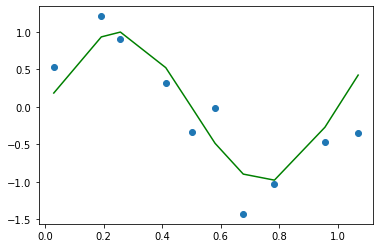

In [183]:
rand.seed(69) 
x_train = np.linspace(0, 1, 10) + uniform(size=10) * 0.1
y_train = np.sin(2 * np.pi * x_train) + randn(10) * 0.4
target = np.sin(2 * np.pi * x_train)

plt.plot(x_train,target,color='green')
plt.scatter(x_train,y_train)
plt.show()

Text(0.5, 0.98, 'Kernel Regression')

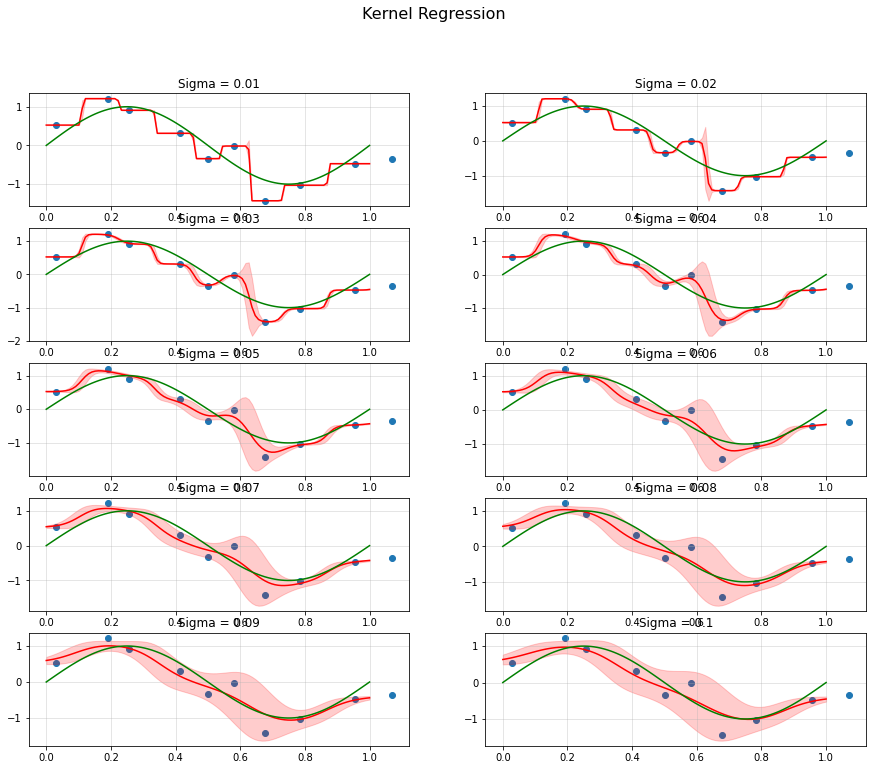

In [185]:
x_test = np.linspace(0,1,100) 
sigmas = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08 , 0.09, 0.1]

fig, axes = plt.subplots(5,2, figsize=(15,12))
for sigma, axis in zip(sigmas, axes.ravel()):
    E,V = E_and_V(x_test,x_train,y_train,sigma)
    axis.scatter(x_train,y_train)
    axis.plot(x_test,E,color='red')
    axis.fill_between(x_test,E - 2*V, E + 2*V, alpha = 0.2, color='red')
    axis.plot(x_test,np.sin(2*np.pi*x_test), color="green")
    axis.grid(alpha=0.4)
    axis.set_title("Sigma = " f"{sigma}")
    axi.set_xlim(0, 1);
plt.suptitle("Kernel Regression", fontsize = 16)

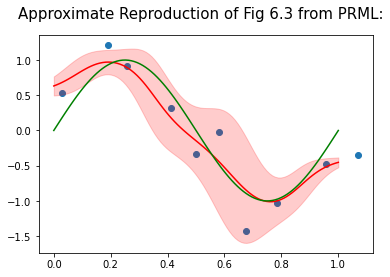

In [191]:
plt.suptitle("Approximate Reproduction of Fig 6.3 from PRML:", fontsize = 15)

E,V = E_and_V(x_test,x_train,y_train,sigma=0.1)
plt.scatter(x_train,y_train)
plt.plot(x_test,E,color='red')
plt.fill_between(x_test,E - 2*V, E + 2*V, alpha = 0.2, color='red')
plt.plot(x_test,np.sin(2*np.pi*x_test), color="green")
